Found classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato_Early_blight', 'Potato_healthy', 'Potato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Tomato_Target_Spot', 'Tomato_Two_spotted_spider_mite', 'Tomato_YellowLeaf__Curl_Virus']
Auto-split complete!
Found 16504 files belonging to 15 classes.
Found 2064 files belonging to 15 classes.
Found 2070 files belonging to 15 classes.
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Target_Spot', 'Tomato_Two_spotted_spider_mite', 'Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy', 'Tomato_mosaic_virus']


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        19,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,068,786 (15.52 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- WARMUP TRAINING ---
Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2252 - loss: 2.4491 4
Epoch 1: val_loss improved from None to 1.64970, saving model to models/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 943s 1s/step - accuracy: 0.3438 - loss: 2.1541 - val_accuracy: 0.6085 - val_loss: 1.6497
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.5620 - loss: 1.5955  
Epoch 2: val_loss improved from 1.64970 to 1.24584, saving model to models/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.5954 - loss: 1.4858 - val_accuracy: 0.7098 - val_loss: 1.2458
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.6678 - loss: 1.2425  
Epoch 3: val_loss improved from 1.24584 to 1.02208, saving model to models/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 788s 982ms/step - accuracy: 0.6838 - loss: 1.1830 - val_accuracy: 0.7616 - val_loss: 1.0221
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.7248 - loss: 1

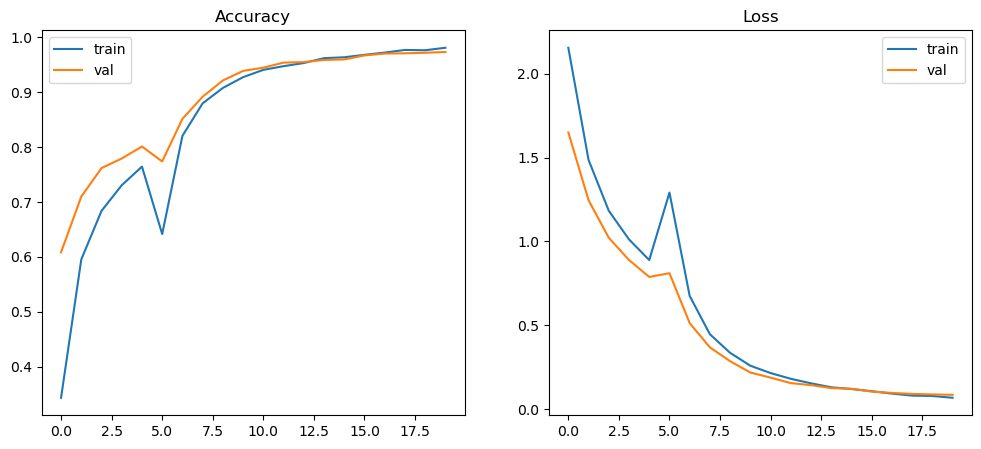

✓ Model and class indices saved!

Evaluating test set...
65/65 ━━━━━━━━━━━━━━━━━━━━ 39s 601ms/step - accuracy: 0.9725 - loss: 0.0852
Test Accuracy: 0.9725

Confusion matrix:
65/65 ━━━━━━━━━━━━━━━━━━━━ 68s 963ms/step


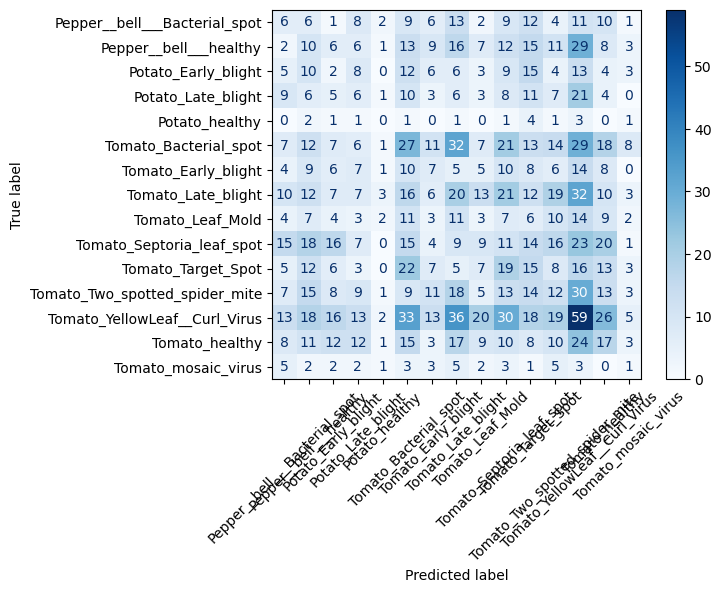

In [2]:
!pip install tensorflow matplotlib scikit-learn

import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image
import json

# -------------------------------------------------------
# CONFIG
# -------------------------------------------------------
DATA_DIR = Path("C:/Users/admin/anaconda_projects/PlantDiseaseAI/PlantDiseaseAI/PlantVillage")
ALL_DATA = DATA_DIR / "all_data"

TRAIN_DIR = DATA_DIR / "train"
VALID_DIR = DATA_DIR / "valid"
TEST_DIR  = DATA_DIR / "test"

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS_WARMUP = 5
EPOCHS_FINETUNE = 15

# -------------------------------------------------------
# STEP 1 — CLEAN + AUTO-SPLIT
# -------------------------------------------------------
# def auto_split():
#     if not ALL_DATA.exists():
#         print("ERROR: PlantVillage/all_data missing.")
#         return False

#     for folder in [TRAIN_DIR, VALID_DIR, TEST_DIR]:
#         if folder.exists():
#             shutil.rmtree(folder)
#         folder.mkdir(parents=True, exist_ok=True)

#     classes = [d for d in ALL_DATA.iterdir() if d.is_dir()]
#     print("Found classes:", [c.name for c in classes])

#     for class_dir in classes:
#         cname = class_dir.name
#         imgs = list(class_dir.glob("*"))
#         random.shuffle(imgs)
#         total = len(imgs)

#         train_n = int(0.8 * total)
#         valid_n = int(0.9 * total)

#         (TRAIN_DIR / cname).mkdir()
#         (VALID_DIR / cname).mkdir()
#         (TEST_DIR / cname).mkdir()

#         for img in imgs[:train_n]:
#             shutil.copy(img, TRAIN_DIR / cname)
#         for img in imgs[train_n:valid_n]:
#             shutil.copy(img, VALID_DIR / cname)
#         for img in imgs[valid_n:]:
#             shutil.copy(img, TEST_DIR / cname)

#     print("Auto-split complete!")
#     return True

# -------------------------------------------------------
# STEP 2 — LOAD PROCESSED DATA
# -------------------------------------------------------
def load_data():
    train_ds = tf.keras.utils.image_dataset_from_directory(
        TRAIN_DIR, image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE, seed=123)

    val_ds = tf.keras.utils.image_dataset_from_directory(
        VALID_DIR, image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE, seed=123)

    test_ds = tf.keras.utils.image_dataset_from_directory(
        TEST_DIR, image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE, seed=123)

    class_names = train_ds.class_names
    print("Classes:", class_names)

    # Augmentation
    aug = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.2),
    ])

    train_ds = train_ds.map(lambda x, y: (preprocess_input(aug(x)), y))
    val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
    test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.shuffle(1000).prefetch(AUTOTUNE)
    val_ds = val_ds.prefetch(AUTOTUNE)
    test_ds = test_ds.prefetch(AUTOTUNE)

    return train_ds, val_ds, test_ds, class_names

# -------------------------------------------------------
# STEP 3 — CREATE MODEL
# -------------------------------------------------------
def build_model(num_classes):
    base = EfficientNetB0(include_top=False, weights="imagenet",
                          input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base.trainable = False

    model = Sequential([
        base,
        GlobalAveragePooling2D(),
        Dropout(0.4),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    model.summary()
    return model, base

# -------------------------------------------------------
# STEP 4 — TRAIN MODEL
# -------------------------------------------------------
def train_model(model, base, train_ds, val_ds):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    os.makedirs('models', exist_ok=True)
    checkpoint = ModelCheckpoint('models/best_model.keras', monitor='val_loss',
                                 save_best_only=True, verbose=1)

    print("\n--- WARMUP TRAINING ---")
    history_warmup = model.fit(train_ds, validation_data=val_ds,
                               epochs=EPOCHS_WARMUP, callbacks=[early_stop, checkpoint])

    print("\n--- FINE TUNING ---")
    base.trainable = True
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history_finetune = model.fit(train_ds, validation_data=val_ds,
                                 epochs=EPOCHS_FINETUNE, callbacks=[early_stop, checkpoint])

    history = {}
    for key in history_warmup.history.keys():
        history[key] = history_warmup.history[key] + history_finetune.history[key]

    return history

# -------------------------------------------------------
# STEP 5 — PLOT HISTORY
# -------------------------------------------------------
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(history['accuracy'], label='train')
    plt.plot(history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()

    plt.show()

# -------------------------------------------------------
# NEW — STEP 6: CORRECT PREDICTION FUNCTION
# -------------------------------------------------------
def predict_image(model, img_path, class_names):
    """Resize 224×224, preprocess, predict correctly."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr = preprocess_input(img_arr)

    preds = model.predict(img_arr)
    pred_idx = np.argmax(preds)
    return class_names[pred_idx], preds[0]

# -------------------------------------------------------
# MAIN
# -------------------------------------------------------
if auto_split():
    train_ds, val_ds, test_ds, class_names = load_data()
    model, base = build_model(len(class_names))
    history = train_model(model, base, train_ds, val_ds)

    plot_training_history(history)

    model.save('models/plant_disease_model.keras')
    class_indices = {str(i): name for i, name in enumerate(class_names)}
    with open('models/class_indices.json', 'w') as f:
        json.dump(class_indices, f, indent=2)

    print("✓ Model and class indices saved!")

    print("\nEvaluating test set...")
    loss, acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {acc:.4f}")

    print("\nConfusion matrix:")
    y_true = np.concatenate([y for x, y in test_ds])
    y_pred = np.argmax(model.predict(test_ds), axis=1)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.show()

In [2]:
   import json
   import os
   
   # Ensure directory exists
   os.makedirs('models', exist_ok=True)
   
   # Save class indices
   class_indices = {class_name: idx for class_name, idx in enumerate(class_names)}
   with open('models/class_indices.json', 'w') as f:
       json.dump(class_indices, f)

NameError: name 'class_names' is not defined

In [ ]:
import json
import os

os.makedirs('models', exist_ok=True)

# CORRECT format: {index: name}
class_indices = {str(i): name for i, name in enumerate(class_names)}

with open('models/class_indices.json', 'w') as f:
    json.dump(class_indices, f, indent=2)

In [1]:
import json
import os

os.makedirs('models', exist_ok=True)
model.save('models/plant_disease_model.keras')

# Get class names from folder (no train_dataset needed!)
class_names = sorted(os.listdir('PlantVillage/train'))

class_indices = {str(i): name for i, name in enumerate(class_names)}
with open('models/class_indices.json', 'w') as f:
    json.dump(class_indices, f, indent=2)

print("✓ Done!")
print(f"Classes: {class_names}")
print(f"Model: {os.path.abspath('models/plant_disease_model.keras')}")
print(f"Classes JSON: {os.path.abspath('models/class_indices.json')}")

NameError: name 'model' is not defined